<center class="alert alert-warning">
    <h1 class="">Delhi Metro Network Analysis</h1>
    <span>Anjul Bhatia</span>
</center>

### Table of Contents

1. <a href="#introduction">Introduction</a>
2. <a href="#objectives">Objective of the Project</a>
3. <a href="#first-steps">First Steps</a>
4. <a href="#geo">Geographical Analysis</a>
5. <a href="#met">Metro Line Analysis</a>
6. <a href="#stat">Station Analysis</a>
7. <a href="#conclusion">Conclusion</a>
8. <a href="#author">About the author</a>

<h3 id="introduction">Introduction</h3>
The Delhi Metro stands as a transformative milestone in urban transportation, revolutionizing travel across India's capital. Since its inception in 2002, the DMRC has rapidly expanded its network to over 390 kilometers, connecting millions daily. Beyond easing congestion, it stimulates economic growth and promotes cleaner air. This project uses Python to analyse and visualize the metro's reach, operations, and infrastructure.

<h3 id="objectives">Objectives of the Project</h3>

1. **To understand the geographical expansion of the Delhi metro:** Analyze and visualize the extent to which the Delhi metro network spans across the city.
2. **To visualize the distribution of each metro line in Delhi:** Create maps that show the routes and stations of each metro line, highlighting their paths through different parts of Delhi.
3. **To determine the largest metro lines in terms of numbers of stations and distance traveled:** Identify and compare the metro lines with the highest number of stations and longest total distance covered.
4. **To visualize the path taken by each line:** Plot the trajectory of each metro line on a map to illustrate its route and connections between stations.
5. **To categorize the stations among elevated, underground, and at-grade:** Classify metro stations based on their architectural design (elevated, underground, or at-grade), providing insights into the infrastructure and construction of the Delhi metro network.

<h3 id="first-steps">First Steps</h3>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # plotting
import matplotlib.pyplot as plt
import folium # interactive mapping (used for Network Analysis and Line Analysis)
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

metro_data = pd.read_csv("Delhi metro.csv")

metro_data.head()

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
0,1,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582
1,2,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483
2,3,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892
3,4,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082
4,5,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807


In [2]:
# Checking for missing values
missing_values = metro_data.isnull().sum()

missing_values

ID (Station ID)                 0
Station Names                   0
Dist. From First Station(km)    0
Metro Line                      0
Opened(Year)                    0
Layout                          0
Latitude                        0
Longitude                       0
dtype: int64

In [3]:
# Checking data type
data_types = metro_data.dtypes

data_types

ID (Station ID)                   int64
Station Names                    object
Dist. From First Station(km)    float64
Metro Line                       object
Opened(Year)                     object
Layout                           object
Latitude                        float64
Longitude                       float64
dtype: object

In [4]:
# Applying basic statistics
metro_data.describe()

,ID (Station ID),Dist. From First Station(km),Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,16.214035,19.218947,28.595428,77.029315
std,11.461808,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,6.000000,7.300000,28.545828,77.107130
50%,14.000000,17.400000,28.613453,77.207220
75%,24.000000,28.800000,28.666360,77.281165
max,49.000000,52.700000,28.878965,77.554479


In [5]:
# Renaming Columns
metro_data.columns = ["Station ID", "Station Name", "Dist From First Station in km", "Metro Line", "Opened Date", "Layout","Latitude","Longitude"]

metro_data.columns

Index(['Station ID', 'Station Name', 'Dist From First Station in km',
       'Metro Line', 'Opened Date', 'Layout', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
# Converting Open Date to datetime format
metro_data['Opened Date'] = pd.to_datetime(metro_data['Opened Date'], dayfirst=True)

<h3 id="geo"> Geographical Analysis</h3>

In [7]:
# defining a color scheme for the metro lines
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

delhi_map_with_metro_lines = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

# adding colored markers for each metro station with line name in tooltip
for index, row in metro_data.iterrows():
    line = row['Metro Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color,icon="subway", prefix='fa')
    ).add_to(delhi_map_with_metro_lines)

# Displaying the updated map
delhi_map_with_metro_lines

In [8]:
metro_data

,Station ID,Station Name,Dist From First Station in km,Metro Line,Opened Date,Layout,Latitude,Longitude
0,1,Shaheed Sthal(First Station),0.0,Red line,2019-03-08,Elevated,28.670611,77.415582
1,2,Hindon River,1.0,Red line,2019-03-08,Elevated,28.878965,77.415483
2,3,Arthala,2.5,Red line,2019-03-08,Elevated,28.676999,77.391892
3,4,Mohan Nagar,3.2,Red line,2019-03-08,Elevated,28.606319,77.106082
4,5,Shyam park,4.5,Red line,2019-03-08,Elevated,28.698807,28.698807
...,...,...,...,...,...,...,...,...
280,2,Shivaji Stadium,1.9,Orange line,2011-02-23,Underground,28.629010,77.211900
281,3,Dhaula Kuan [Conn: Pink],8.3,Orange line,2011-08-15,Elevated,28.591780,77.161550
282,4,Delhi Aerocity,14.5,Orange line,2011-08-15,Underground,28.548810,77.120920
283,5,IGI Airport,17.9,Orange line,2011-02-23,Underground,28.556930,77.086690


### Metro Line Analysis

In [9]:
metro_lines = metro_data["Metro Line"].drop_duplicates().reset_index().drop("index", axis=1)

print("Number of Metro Lines in Delhi ", metro_lines.count())

metro_lines

Number of Metro Lines in Delhi  Metro Line    13
dtype: int64


,Metro Line
0,Red line
1,Yellow line
2,Blue line
3,Blue line branch
4,Green line branch
5,Green line
6,Rapid Metro
7,Voilet line
8,Magenta line
9,Pink line


Here we can see that the Delhi Metro System has **13 color coded lines.**

Theses are:
<ol>
   <li style="color:#FF4040; font-weight:600;">Red Line</li> 
    <li style="color:#FFDF00; font-weight:600;">Yellow Line</li> 
    <li style="color:#4169E1; font-weight:600;">Blue Line</li> 
    <li style="color:#4169E1; font-weight:600;">Blue Line Branch</li> 
    <li style="color:#20B2AA; font-weight:600;">Green Line</li> 
    <li style="color:#20B2AA; font-weight:600;">Green Line Branch</li> 
    <li style="color:#FC8EAC; font-weight:600;">Pink Line</li> 
    <li style="color:#553592; font-weight:600;">Voilet Line</li> 
    <li style="color:#CC338B; font-weight:600;">Magenta Line</li> 
    <li style="color:#12EDEE; font-weight:600;">Aqua Line</li> 
    <li style="color:#838996; font-weight:600;">Gray Line</li> 
    <li style="color:#FF8C00; font-weight:600;">Orange Line/Airport Express</li> 
    <li style="color:#; font-weight:600;">Rapid Metro</li> 
</ol>

In [10]:
stations_per_line = metro_data['Metro Line'].value_counts()

# calculating the total distance of each metro line (max distance from start)
total_distance_per_line = metro_data.groupby('Metro Line')['Dist From First Station in km'].max()

total_distance_per_line = round(total_distance_per_line,2)
avg_distance_per_line = round(total_distance_per_line / (stations_per_line - 1), 2)


line_analysis = pd.DataFrame({
    'Line': stations_per_line.index,
    'Number of Stations': stations_per_line.values,
    "Total Distance Covered (km)": round(total_distance_per_line,2),
    'Average Distance Between Stations (km)': avg_distance_per_line
})

# sorting the DataFrame by the number of stations
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)

# Function to highlight the max and min rows
def highlight_max_dist(s):
    is_max = s == s.max()
    return ['color: royalblue; font-weight:600' if v else '' for v in is_max]

line_analysis.reset_index(drop=True, inplace=True)
line_analysis['Total Distance Covered (km)'] = round(line_analysis['Total Distance Covered (km)'])
line_analysis_styled = line_analysis.style.apply(highlight_max_dist, subset=['Total Distance Covered (km)'], axis=0).format({'Total Distance Covered (km)': '{:.2f}', 'Average Distance Between Stations (km)': '{:.2f}'})
line_analysis_styled

,Line,Number of Stations,Total Distance Covered (km),Average Distance Between Stations (km)
0,Blue line,49,27.00,1.36
1,Pink line,38,53.00,1.10
2,Yellow line,37,8.00,1.16
3,Voilet line,34,4.00,1.95
4,Red line,29,25.00,1.24
5,Magenta line,25,2.00,1.05
6,Green line,21,33.00,1.38
7,Aqua line,21,21.00,4.16
8,Rapid Metro,11,53.00,1.42
9,Blue line branch,8,10.00,1.00


**Results:**
1. Blue line has the most number of stations (49) (including Blue line branch: 57) followed by Pink line (38 stations) and Yellow Line (37 stations).
2. Pink line is the largest metro line with a total distance covered of 53km.

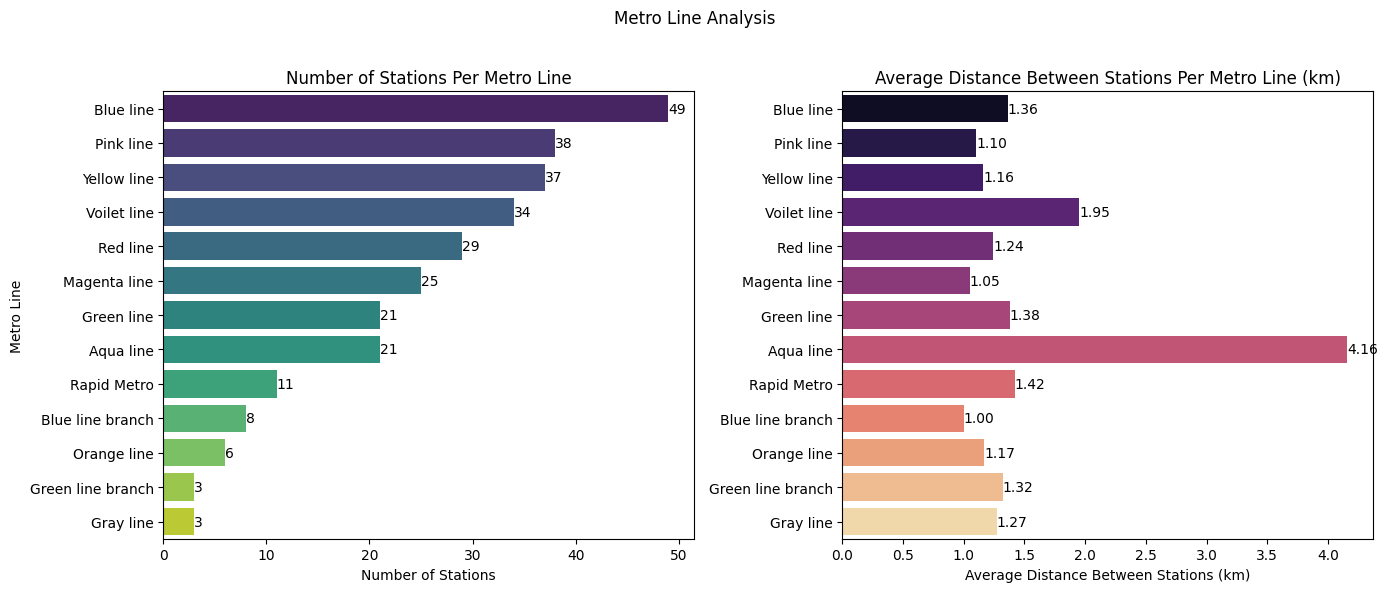

In [11]:
# Create a figure with three subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Number of Stations Per Metro Line
sns.barplot(y='Line', x='Number of Stations', data=line_analysis, ax=axes[0], palette='viridis')
axes[0].set_title('Number of Stations Per Metro Line')
axes[0].set_xlabel('Number of Stations')
axes[0].set_ylabel('Metro Line')

# Add labels on top of bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f')

# Plot Average Distance Between Stations Per Metro Line
sns.barplot(y='Line', x='Average Distance Between Stations (km)', data=line_analysis, ax=axes[1], palette='magma')
axes[1].set_title('Average Distance Between Stations Per Metro Line (km)')
axes[1].set_xlabel('Average Distance Between Stations (km)')
axes[1].set_ylabel('')

# Add labels on top of bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

# Update layout and show the plot
plt.suptitle('Metro Line Analysis')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect to make room for the suptitle
plt.show()

In [12]:
stations_per_line

Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Green line           21
Aqua line            21
Rapid Metro          11
Blue line branch      8
Orange line           6
Green line branch     3
Gray line             3
Name: Metro Line, dtype: int64

In [13]:
# "Blue line","Pink line","Yellow line","Voilet line", 
#"Red line","Magenta line","Green line","Aqua line", "Rapid Metro",
#"Blue line branch","Orange line","Green line branch", "Gray line"

target_line = "Yellow line" # Select the line for which you want to see the route.

target_route = metro_data[metro_data['Metro Line'] == target_line]

target_route

,Station ID,Station Name,Dist From First Station in km,Metro Line,Opened Date,Layout,Latitude,Longitude
29,1,Samaypur Badli(First Station),0.0,Yellow line,2015-11-10,Elevated,28.744616,77.138265
30,2,Rohini Sector 18-19,0.8,Yellow line,2015-11-10,Elevated,28.738348,77.139832
31,3,Haiderpur Badli Mor,2.1,Yellow line,2015-11-10,Elevated,28.730121,77.149403
32,4,Jahangirpuri,3.4,Yellow line,2009-02-04,Elevated,28.725920,77.162670
33,5,Adarsh Nagar,4.7,Yellow line,2009-02-04,Elevated,28.716420,77.170460
34,6,Azadpur [Conn: Pink],6.2,Yellow line,2009-02-04,Elevated,28.706960,77.180530
35,7,Model Town,7.6,Yellow line,2009-02-04,Elevated,28.702780,77.193630
36,8,Guru Tegh Bahadur Nagar,9.0,Yellow line,2009-02-04,Underground,28.697850,77.207220
37,9,Vishwavidyalaya,9.8,Yellow line,2004-12-20,Underground,28.694800,77.214830
38,10,Vidhan Sabha,10.8,Yellow line,2004-12-20,Underground,28.688020,77.221400


In [14]:
# Create a folium map centered around the first station
route_map_with_marker_and_lines = folium.Map(location=[target_route['Latitude'].iloc[0], target_route['Longitude'].iloc[0]], zoom_start=11)

# Add a marker cluster
marker_cluster = MarkerCluster().add_to(route_map_with_marker_and_lines)

# Store the markers in a dictionary for easy access
markers_dict = {}

#Plot the stations on the map
for idx, row in target_route.iterrows():
    line = row['Metro Line']
    color = line_colors.get(line, 'black')
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']} (ID: {row['Station ID']})",
        tooltip=f"{row['Station Name']} ({row['Metro Line']})",
        icon=folium.Icon(color=color,icon="subway", prefix='fa')
    ).add_to(marker_cluster)
    markers_dict[row['Station Name']] = marker

# Plot lines between the stations
for i in range(len(target_route) - 1):
    line = target_route.iloc[i]['Metro Line']
    color = line_colors.get(line, 'black')
    folium.PolyLine(
        locations=[
            [target_route.iloc[i]['Latitude'], target_route.iloc[i]['Longitude']],
            [target_route.iloc[i+1]['Latitude'], target_route.iloc[i+1]['Longitude']]
        ],
        color=color,
        weight=5,
        opacity=0.7,
    ).add_to(route_map_with_marker_and_lines)

# Add a legend for station names with clickable links
legend_html = f'''
     <div style="position: fixed; 
                 bottom: 100px; left: 10px; width: 200px; height: 300px; 
                 z-index:9999; font-size:14px;
                 background-color:white;
                 overflow-y: auto;
                 background: #d7eda6;
                 ">
     <b style="display:flex; width: 100%; justify-content: center;">{target_line}</b>
     '''

for idx, row in target_route.iterrows():
    station_name = row["Station Name"]
    legend_html += f'<i style="color: "black"; font-size:24px; width:fit-content;">&bull;</i> <a style="font-size:12px; width:fit-content; href="javascript:panTo({row["Latitude"]}, {row["Longitude"]})">{station_name}</a><br>'

legend_html += '</div>'

# Add the legend to the map
route_map_with_marker_and_lines.get_root().html.add_child(folium.Element(legend_html))

# JavaScript function to zoom to marker
js_zoom_function = '''
    <script>
    function panTo(index) {
        var lat = %s;
        var lon = %s;
        map.setView([`lat`, `lon`], 15);
    }
    </script>
'''

# Add legend HTML and JavaScript function to the map
route_map_with_marker_and_lines.get_root().html.add_child(folium.Element(legend_html + js_zoom_function))

# Display the map (in Jupyter Notebook or other interactive environment)
route_map_with_marker_and_lines


In [15]:
# "Blue line","Pink line","Yellow line","Voilet line", 
#"Red line","Magenta line","Green line","Aqua line", "Rapid Metro",
#"Blue line branch","Orange line","Green line branch", "Gray line"

target_line = "Blue line" # Select the line for which you want to see the route.

target_route = metro_data[metro_data['Metro Line'] == target_line]

target_route

,Station ID,Station Name,Dist From First Station in km,Metro Line,Opened Date,Layout,Latitude,Longitude
66,1,Dwarka Sector 21(First station) [Conn: Orange],0.0,Blue line,2010-10-30,Underground,28.552260,77.058280
67,2,Dwarka Sector 8,1.7,Blue line,2010-10-30,Elevated,28.565830,77.067060
68,3,Dwarka Sector 9,2.7,Blue line,2006-04-01,Elevated,28.574870,77.064540
69,4,Dwarka Sector 10,3.8,Blue line,2006-04-01,Elevated,28.580680,77.056820
70,5,Dwarka Sector 11,4.8,Blue line,2006-04-01,Elevated,28.586570,77.049290
71,6,Dwarka Sector 12,5.8,Blue line,2006-04-01,Elevated,28.592320,77.040510
72,7,Dwarka Sector 13,6.7,Blue line,2006-04-01,Elevated,28.597220,77.033260
73,8,Dwarka Sector 14,7.6,Blue line,2006-04-01,Elevated,28.602230,77.025880
74,9,Dwarka [Conn: Gray],9.1,Blue line,2005-12-30,Elevated,28.615640,77.021970
75,10,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [16]:
# Create a folium map centered around the first station
route_map_with_marker_and_lines = folium.Map(location=[target_route['Latitude'].iloc[0], target_route['Longitude'].iloc[0]], zoom_start=11)

# Add a marker cluster
marker_cluster = MarkerCluster().add_to(route_map_with_marker_and_lines)

# Store the markers in a dictionary for easy access
markers_dict = {}

#Plot the stations on the map
for idx, row in target_route.iterrows():
    line = row['Metro Line']
    color = line_colors.get(line, 'black')
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']} (ID: {row['Station ID']})",
        tooltip=f"{row['Station Name']} ({row['Metro Line']})",
        icon=folium.Icon(color=color,icon="subway", prefix='fa')
    ).add_to(marker_cluster)
    markers_dict[row['Station Name']] = marker

# Plot lines between the stations
for i in range(len(target_route) - 1):
    line = target_route.iloc[i]['Metro Line']
    color = line_colors.get(line, 'black')
    folium.PolyLine(
        locations=[
            [target_route.iloc[i]['Latitude'], target_route.iloc[i]['Longitude']],
            [target_route.iloc[i+1]['Latitude'], target_route.iloc[i+1]['Longitude']]
        ],
        color=color,
        weight=5,
        opacity=0.7,
    ).add_to(route_map_with_marker_and_lines)

# Add a legend for station names with clickable links
legend_html = f'''
     <div style="position: fixed; 
                 bottom: 100px; left: 10px; width: 200px; height: 300px; 
                 z-index:9999; font-size:14px;
                 background-color:white;
                 overflow-y: auto;
                 background: #d7eda6;
                 ">
     <b style="display:flex; width: 100%; justify-content: center;">{target_line}</b>
     '''

for idx, row in target_route.iterrows():
    station_name = row["Station Name"]
    legend_html += f'<i style="color: "black"; font-size:24px; width:fit-content;">&bull;</i> <a style="font-size:12px; width:fit-content; href="javascript:panTo({row["Latitude"]}, {row["Longitude"]})">{station_name}</a><br>'

legend_html += '</div>'

# Add the legend to the map
route_map_with_marker_and_lines.get_root().html.add_child(folium.Element(legend_html))

# JavaScript function to zoom to marker
js_zoom_function = '''
    <script>
    function panTo(index) {
        var lat = %s;
        var lon = %s;
        map.setView([`lat`, `lon`], 15);
    }
    </script>
'''

# Add legend HTML and JavaScript function to the map
route_map_with_marker_and_lines.get_root().html.add_child(folium.Element(legend_html + js_zoom_function))

# Display the map (in Jupyter Notebook or other interactive environment)
route_map_with_marker_and_lines


Similarly, one can change the `target_line` variable to access other routes as well.

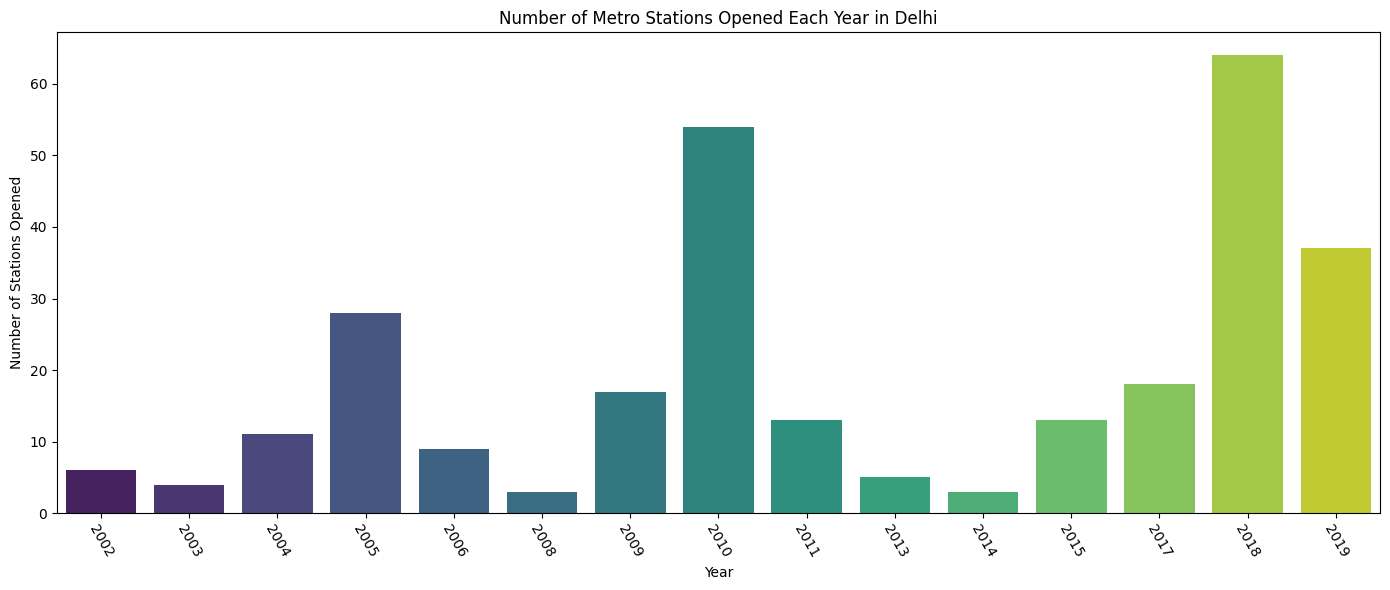

In [17]:
metro_data['Opened Year'] = metro_data['Opened Date'].dt.year

# Counting the number of stations opened each year
stations_per_year = metro_data['Opened Year'].value_counts().sort_index()
stations_per_year_df = stations_per_year.reset_index()
stations_per_year_df.columns = ['Year', 'Number of Stations']

# Plotting with Seaborn
plt.figure(figsize=(14, 6))
sns.barplot(data=stations_per_year_df, x='Year', y='Number of Stations', palette='viridis')
plt.title('Number of Metro Stations Opened Each Year in Delhi')
plt.xlabel('Year')
plt.ylabel('Number of Stations Opened')
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

<h3 id="stats">Station Layout Analysis</h3>

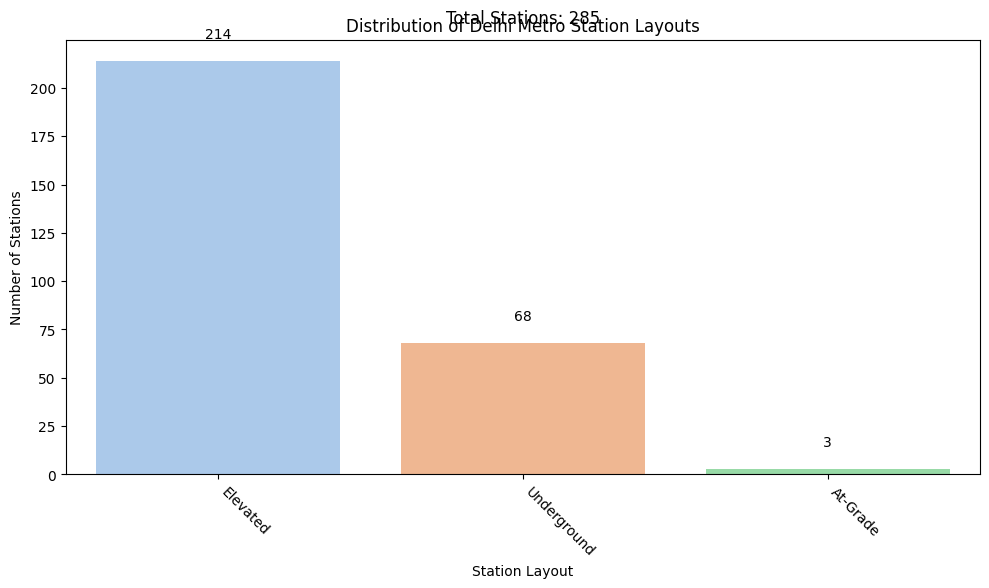

In [18]:
# Counting the number of each station layout type
layout_counts = metro_data['Layout'].value_counts()

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=layout_counts.index, y=layout_counts.values, palette='pastel')
plt.title('Distribution of Delhi Metro Station Layouts')
plt.xlabel('Station Layout')
plt.ylabel('Number of Stations')
plt.xticks(rotation=-45, ha='left')  # Adjust rotation and alignment of x-axis labels

# Adding a label on top showing total number of stations
total_stations = layout_counts.sum()
plt.text(0.5, 1.05, f'Total Stations: {total_stations}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
# Adding labels on top of each bar
for index, value in enumerate(layout_counts):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

We can see that out of 285 stations 214 are Elevated, 68 are Underground and only 3 are At-grade level.

In [19]:
# Function to get station name and opening date based on min or max opening date
def get_station_info(group):
    oldest_station = group.loc[group['Opened Date'].idxmin()]
    newest_station = group.loc[group['Opened Date'].idxmax()]
    return pd.Series({
        'Oldest_Station': oldest_station['Station Name'],
        'Oldest_Opening_Date': oldest_station['Opened Date'].strftime('%Y-%m-%d'),
        'Newest_Station': newest_station['Station Name'],
        'Newest_Opening_Date': newest_station['Opened Date'].strftime('%Y-%m-%d')
    })

# Group by metro line and apply the function to get oldest and newest stations
oldest_newest_stations = metro_data.groupby('Metro Line').apply(get_station_info).reset_index()

oldest_newest_stations

,Metro Line,Oldest_Station,Oldest_Opening_Date,Newest_Station,Newest_Opening_Date
0,Aqua line,Noida Sector 51 [Conn: Blue],2019-01-25,Noida Sector 51 [Conn: Blue],2019-01-25
1,Blue line,Dwarka [Conn: Gray],2005-12-30,Noida Sector 34,2019-03-09
2,Blue line branch,Yamuna Bank,2009-05-10,Kaushambi,2011-07-14
3,Gray line,Dwarka [Conn: Blue],2019-10-04,Dwarka [Conn: Blue],2019-10-04
4,Green line,Inderlok Conn:Red,2010-04-02,Mundka Industrial Area (MIA),2018-06-24
5,Green line branch,Ashok Park Main,2010-04-02,Kirti Nagar [Conn: Blue],2011-08-27
6,Magenta line,Kalkaji Mandir [Conn: Violet],2017-12-25,Janak Puri West [Conn: Blue],2018-05-29
7,Orange line,New Delhi-Airport Express [Conn: Yellow],2011-02-23,Dhaula Kuan [Conn: Pink],2011-08-15
8,Pink line,Majlis Park,2018-03-14,Vinobapuri,2018-12-31
9,Rapid Metro,Sikandarpur [Conn: Yellow],2013-11-14,Sector 53-54,2017-04-25


In the table above, we can see the oldest added and the newest added stations of each metro line.

<h3 id="conclusion">Conclusion</h3>

1. **Number of Metro Stations:** There are 285 Metro stations in the Delhi Metro network at present. These stations not only provides a faster, economic mode of transportation but also has reduces carbon emmissions.
2. **Metro Lines:** The metro network is spread all over Delhi by 13 color-coded lines. Multiple intersections in these lines furthers connectivity to every corner of the capital.
3. **The Oldest Line:** The red line is the oldest line in the metro network and initially started operations between Tis Hazari and Shahdara.
4. **The Busiest Line**: The Blue line is the busiest line connecting 49 stations. In addition to that the blue line branch connects 8 more lines.
5. **The Largest Line**: The Pink line is the largest metro line covering 53km distance across Delhi and connecting with the Red, Yellow, Blue and Orange line on multiple stations.
6. **Utilising the space:** Out of 285 stations 214 are Elevated, 68 are Underground and only 3 are At-grade level. This showes how the space has been utilised in order to provide this means of transportation.

<h3 id="author">About the Author</h3>

**Anjul Bhatia** is an Undergraduate student of Delhi University pursuing his final year at Kirori Mal College.

In case you have any suggesstions, feel free to connect with me:
<a style="margin-left:10px;" href="https://www.linkedin.com/in/anjulbhatia">LinkedIn</a>
<a style="margin-left:10px;" href="mailto:anjulbhatia2003@gmail.com">Email</a>